# Introduction
This notebook contains code for our work on preprocessing data and the model that I implemented as a part of our Machine Learning group project as a part of our coursework.

# Data Preprocessing

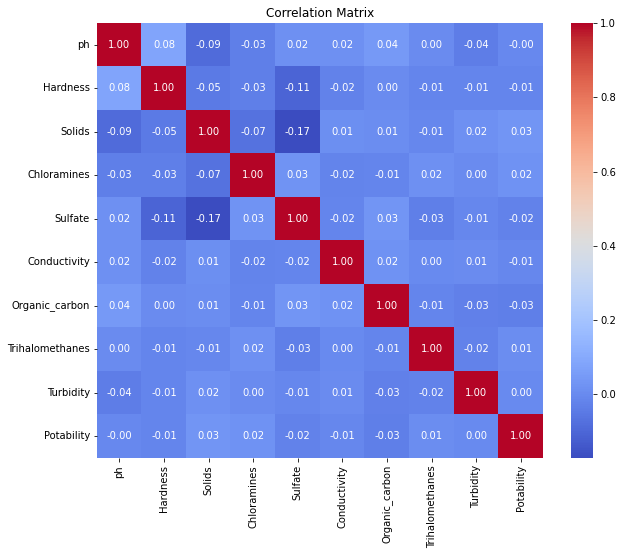

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
potability = pd.read_csv('water_potability.csv')
corr_matrix = potability.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


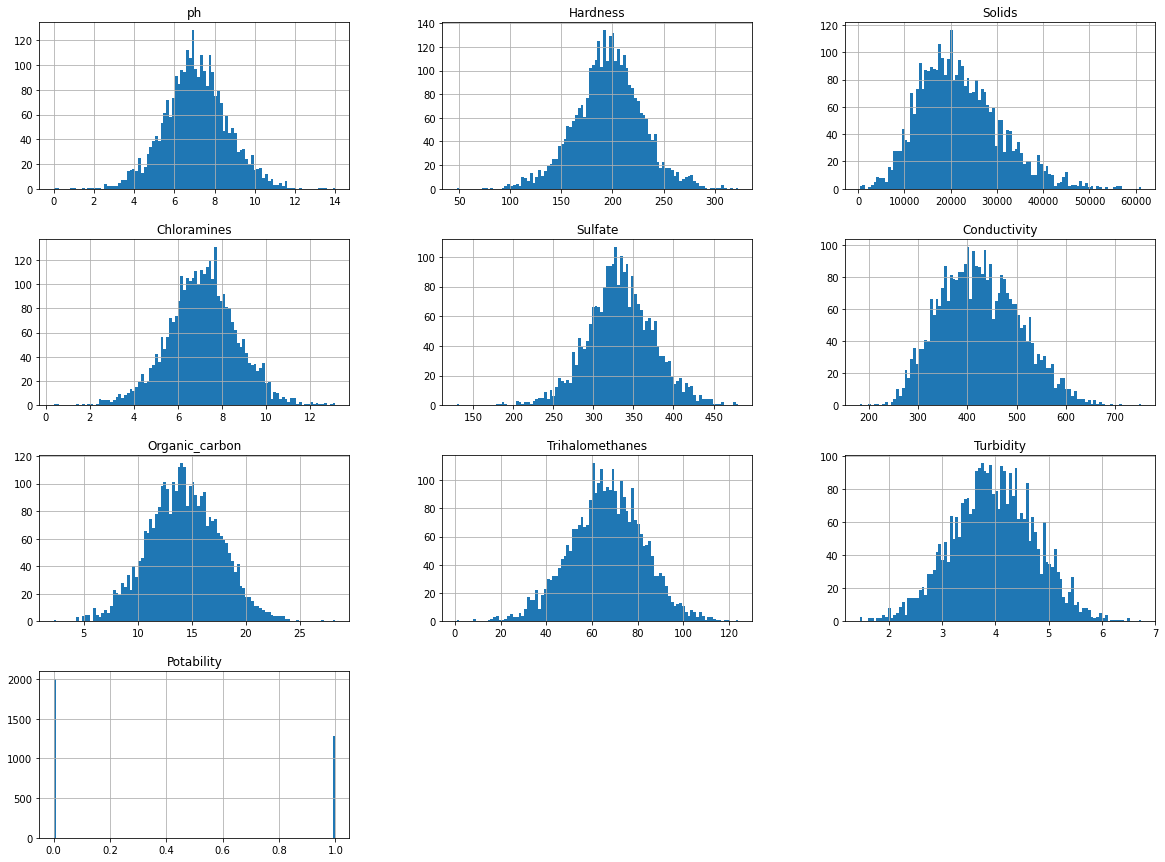

In [2]:
potability.hist(bins=100, figsize=(20,15))
potability.describe()

From the above plots, we notice that the features all have fairly low covariances with each other, and especially with the final output column (in which case the highest covariance seen is 0.03). While this does not necessarily mean there is no relation between these attributes (as covariance only shows linear relations), it could still indicate that the features captured are not very good indicators of our target variable, namely the potability of water.

Moreover, interestingly we see that our data seems to look surprisingly Gaussian in its distribution. However, there are null values in a few columns that we need to eliminate.

In [3]:
potability.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We find there are three columns with null values which we need to remove. For all of these columns - especially in the case of Sulfate - the number of nulls is fairly significant compared to the total number of records. As such, we replace these nulls with appropriate values instead of dropping the rows containing nulls altogether, so we don't lose significant data from other columns.

In [4]:
mean_ph_potable = potability[potability['Potability'] == 1][['ph']].mean().iloc[0]
mean_ph_non_potable = potability[potability['Potability'] == 0][['ph']].mean().iloc[0]

mean_sulfate_potable = potability[potability['Potability'] == 1][['Sulfate']].mean().iloc[0]
mean_sulfate_non_potable = potability[potability['Potability'] == 0][['Sulfate']].mean().iloc[0]

mean_trihalomethanes_potable = potability[potability['Potability'] == 1][['Trihalomethanes']].mean().iloc[0]
mean_trihalomethanes_non_potable = potability[potability['Potability'] == 0][['Trihalomethanes']].mean().iloc[0]

print("Mean ph for potable water:", mean_ph_potable)
print("Mean ph for non potable water:", mean_ph_potable)

print("\nMean Sulfate for potable water:", mean_sulfate_potable)
print("Mean Sulfate for non potable water:", mean_sulfate_non_potable)

print("\nMean Trihalomethanes for potable water:", mean_trihalomethanes_potable)
print("Mean Trihalomethanes for non potable water:", mean_trihalomethanes_non_potable)

Mean ph for potable water: 7.073783295381195
Mean ph for non potable water: 7.073783295381195

Mean Sulfate for potable water: 332.56699023366536
Mean Sulfate for non potable water: 334.5642895786884

Mean Trihalomethanes for potable water: 66.53968374070118
Mean Trihalomethanes for non potable water: 66.3035552730608


We find that the difference in means for potable and non potable water is negligible in all three cases. As such, instead of filling these means conditionally, we simply replace all nulls in a column with the overall mean of the remaining values instead.

In [5]:
# Replacing null values with the column mean
potability['ph'].fillna(value = potability['ph'].mean() , inplace = True)
potability['Sulfate'].fillna(value = potability['Sulfate'].mean() , inplace = True)
potability['Trihalomethanes'].fillna(value = potability['Trihalomethanes'].mean() , inplace = True)

### Standardizing Data
Certain models, like KNN, use the 'distance' between data points for calculation, and as such are susceptible to giving more weight to features with values of larger magnitudes. As such, we standardize our data to help mitigate this effect.

We choose standardization instead of normalization here as most of our data already resembles Gaussian distributions, and standardization is less sensitive to outliers.


In [6]:
independent_attributes = [
    "ph",
    "Hardness",
    "Solids",
    "Chloramines",
    "Sulfate",
    "Conductivity",
    "Organic_carbon",
    "Trihalomethanes",
    "Turbidity",
]

for attribute in independent_attributes:
  potability[attribute] = (potability[attribute] - potability[attribute].mean()) / potability[attribute].std()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000
mean,4.914001e-14,-6.791961e-15,-8.682852e-16,-3.869344e-17,-3.212299e-14,1.426149e-14,-5.344728e-15,3.805801e-15,1.121339e-15,0.390110
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.487849
min,-4.817011e+00,-4.529762e+00,-2.473966e+00,-4.276635e+00,-5.665771e+00,-3.027828e+00,-3.653077e+00,-4.163525e+00,-3.225068e+00,0.000000
25%,-5.463578e-01,-5.936466e-01,-7.238810e-01,-6.284287e-01,-4.615366e-01,-7.481769e-01,-6.708163e-01,-6.181808e-01,-6.754064e-01,0.000000
50%,3.927437e-14,1.819146e-02,-1.238810e-01,5.067435e-03,-3.302782e-14,-5.345119e-02,-2.014179e-02,3.604556e-15,-1.506775e-02,0.000000
75%,5.369244e-01,6.173390e-01,6.065606e-01,6.270101e-01,4.595678e-01,6.877555e-01,6.869921e-01,6.512615e-01,6.836823e-01,1.000000
max,4.707084e+00,3.855092e+00,4.472006e+00,3.793052e+00,4.074273e+00,4.047526e+00,4.236500e+00,3.652767e+00,3.552379e+00,1.000000


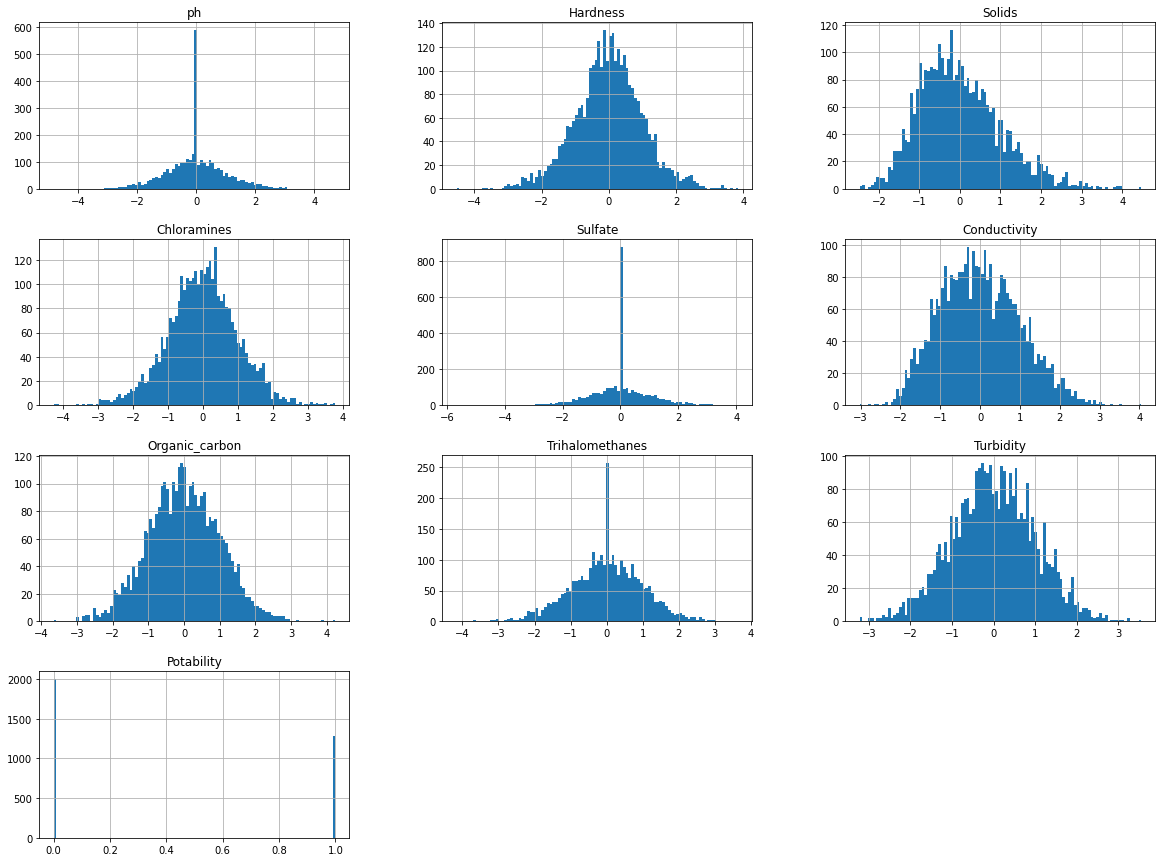

In [7]:
potability.hist(bins=100, figsize=(20,15))
potability.describe()

In [8]:
for col in potability:
    if(col != "Potability"):
        q_low = potability[col].quantile(0.01)
        q_hi  = potability[col].quantile(0.99)
        potability = potability[(potability[col] < q_hi) & (potability[col] > q_low)]

Function to split data into train and test sets with oversampling

In [9]:
from imblearn.over_sampling import RandomOverSampler

def split_train_test(data, test_ratio):
    """
    Split data into test and train datasets according to the given ratio.

    Parameters:
    - data (pandas dataframe): Training feature data of shape (n_samples, n_features).
    - test_ratio: Specifies the ratio of test data to complete data.

    Returns:
    - train_data: Train dataset
    - test_data: Test dataset
    """

    # Use oversampler to decrease bias due to insufficient samples
    ros = RandomOverSampler(sampling_strategy = 1)
    y_data = data['Potability']
    x_data = data.drop("Potability", axis = 1)
    x_data, y_data = ros.fit_resample(x_data, y_data)
    data = pd.concat([x_data, y_data], axis=1, join='inner')

    # Split data into train and test datasets
    test_set_size = int(len(data) * test_ratio)
    shuffled_indices = np.random.permutation(len(data))

    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    # Return train and test dataframes
    return data.iloc[train_indices], data.iloc[test_indices]

Split data into train and test datasets

In [10]:
train_df, test_df = split_train_test(potability, 0.3)
y_train = train_df['Potability']
x_train = train_df.drop("Potability", axis = 1)
y_test = test_df['Potability']
x_test = test_df.drop("Potability", axis = 1)

# Adaptive kNN

Upon observing very low correlation values in our dataset, it seemed clear that there weren't strong linear relations between attributes and target, so we decided to try using a non-linear model. We read some research papers that attempted to solve the water potability classification problem. Among them one of them (https://assets.researchsquare.com/files/rs-2965961/v1_covered_649f17f0-0d51-4c3d-a60d-457abf7d3d9f.pdf?c=1685374187) used the k-nearest neighbours (kNN) algorithm. However, on further investigation, we stumbled across the paper "An adaptive k-nearest neighbor algorithm" by Shiliang Sun and Rongqing Huang. The code given below is an implementation of the algorithm described by that paper.

In [11]:
def getMetrics(predictions, test_labels):
    """
    Calculates various metrics based on the predicted and actual labels.

    Parameters:
    - predictions: A NumPy array of the predicted labels.
    - test_labels: A NumPy array of the actual labels.

    Returns:
    - [accuracy, precision, recall, f1_score, confusion_matrix]: A list containing the computed accuracy, precision, recall, F1 score, and confusion matrix.
    """
    accuracy = (predictions == test_labels).sum() / len(test_labels)

    true_positives = ((predictions == 1) & (test_labels == 1)).sum()
    false_positives = ((predictions == 1) & (test_labels == 0)).sum()
    precision = true_positives / (true_positives + false_positives)

    true_positives = ((predictions == 1) & (test_labels == 1)).sum()
    false_negatives = ((predictions == 0) & (test_labels == 1)).sum()

    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)

    true_negatives = ((predictions == 0) & (test_labels == 0)).sum()
    confusion_matrix = np.array(
        [[true_negatives, false_positives], [false_negatives, true_positives]]
    )

    return [accuracy, precision, recall, f1_score, confusion_matrix]

In [12]:
def distance(x, y):
    sum = 0
    for a, b in zip(x, y):
        sum += (a - b) ** 2
    return sum

In [13]:
def knn(x, y, sample, k):
    """
    A k-nearest neighbour's function that predicted the class of a test sample.

    Parameters:
    - x: The training feature data
    - y: The class labels of the training set
    - sample: The test sample whose class needs to be predicted
    - k: The choice of k for the k-nearest neighbours algorithm

    """
    distances = []

    for i in range(len(x)):
        distances.append((distance(x[i], sample), y[i]))

    distances.sort(key=lambda x: x[0])
    nearest = distances[1 : 1 + k] # Stores the distance and the label of the k-nearest neighbours

    classFreq = {}
    classes = []

    for i in nearest:
        classes.append(i[1])

    for i in classes:
        classFreq[i] = classFreq.get(i, 0) + 1 # Fill the dictionary with the labels and their frequencies

    majority = max(classFreq, key=classFreq.get)
    return majority # Return the most common label of the k-nearest neighbours


In [14]:
def getOptK(x, y, sample, k):
    """
    Find the 'optimal' k value for the adaptive kNN algorithm (AdaNN). This value is the lowest k that kNN predicts the correct class. If no such value is found, the optimal k
    is made equal to the parameter k.

    Parameters:
    - x: The training feature data.
    - y: The test feature data.
    - sample: The sample whose optimal k needs to be found.
    - k: The maximum value that the optimal k may take.

    Returns: The optimal k
    """
    for i in range(1, k):
        y_pred = knn(x, y, sample[0], i)
        if y_pred == sample[1]:
            return i
    return k

The average accuracy for 1NN is  0.5866732477788745
The average accuracy for 2NN is  0.5866732477788745
The average accuracy for 3NN is  0.5653504442250741
The average accuracy for 4NN is  0.5783810463968411
The average accuracy for 5NN is  0.5653504442250741
The average accuracy for 6NN is  0.5784797630799605
The average accuracy for 7NN is  0.5703849950641658
The average accuracy for 8NN is  0.5801579466929911
The average accuracy for 9NN is  0.5745310957551827

The average accuracy for AdaNN is  0.636229022704837


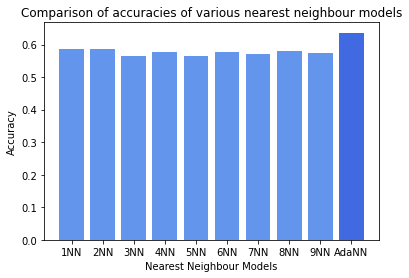

In [15]:
maxK = 9 # As used in the research paper

iterations = 10 # As used in the research paper

knn_y = []
knn_metrics = []

ada_y = []
ada_metrics = []

for iter in range(iterations):
    train_data, test_data = split_train_test(potability, 0.3)

    x = train_data.drop("Potability", axis="columns")
    x = x.to_numpy()
    y = train_data["Potability"].to_numpy()

    test_x = test_data.drop("Potability", axis="columns")
    test_x = test_x.to_numpy()
    test_y = test_data["Potability"].to_numpy()

    for k in range(1, maxK + 1): # Perform kNN from k = 1 to maxK for the test data
        predicted_y = []
        for test in test_x:
            predicted_y.append(knn(x, y, test, k))
        knn_y.append(predicted_y)
        knn_metrics.append(getMetrics(np.array(predicted_y), test_y))

    # Adaptive kNN begins:
    ada_pred = []
    for test in test_x:
        # Find the nearest neighbour for each test sample
        distances = []
        min_distance = distance(x[1], test)
        nearest = (min_distance, x[1], y[1])

        for i in range(2, len(x)):
            if distance(x[i], test) < min_distance:
                min_distance = distance(x[i], test)
                nearest = (min_distance, x[i], y[i])

        kopt = getOptK(x, y, (nearest[1], nearest[2]), k) # Find the optimal k for the nearest neighbour
        ada_pred.append(knn(x, y, test, kopt)) # Perform kNN on the test sample using that optimal k
    ada_metrics.append(getMetrics(np.array(ada_pred), test_y))
    ada_y.append(ada_pred)

# Metrics

bar_data = []
bar_names = []

for j in range(maxK):
    av_arr = knn_metrics[j::maxK]
    average = 0
    for a in av_arr:
        average += a[0]
    average /= iterations
    bar_data.append(average)
    bar_names.append(f"{j+1}NN")
    print(f"The average accuracy for {j+1}NN is ", average)

ada_av = 0
ada_av_precision = 0
ada_av_recall = 0
ada_av_confusion = 0

for j in ada_metrics:
    ada_av += j[0]
    ada_av_precision += j[1]
    ada_av_recall += j[2]
    ada_av_confusion += j[4]

ada_av /= iterations
ada_av_precision /= iterations
ada_av_recall /= iterations

ada_av_f1 = 2 * (ada_av_precision * ada_av_recall) / (ada_av_precision + ada_av_recall)

bar_data.append(ada_av)
bar_names.append("AdaNN")

print("\nThe average accuracy for AdaNN is ", ada_av)

# Plotting

bar_colours = ["cornflowerblue"] * maxK
bar_colours.append("royalblue")

fig, ax = plt.subplots()

ax.bar(bar_names, bar_data, color=bar_colours)
ax.set_xlabel("Nearest Neighbour Models")
ax.set_ylabel("Accuracy")
ax.set_title("Comparison of accuracies of various nearest neighbour models")

plt.show()

Calculating Metrics

In [16]:
print("Average Accuracy: {}".format(ada_av))
print("Average Precision: {}".format(ada_av_precision))
print("Average Recall: {}".format(ada_av_recall))
print("Average F1 Score: {}".format(ada_av_f1))
print("Overall Confusion Matrix: {}".format(ada_av_confusion))

ada_av_metrics = [ada_av, ada_av_precision, ada_av_recall, ada_av_f1, ada_av_confusion]

Average Accuracy: 0.636229022704837
Average Precision: 0.6188372269833404
Average Recall: 0.7049213085537703
Average F1 Score: 0.6590802417751865
Overall Confusion Matrix: [[2886 2193]
 [1492 3559]]
